# Lending Club Default Analysis

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning
3. Data Analysis 
4. Recommendations


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("loan.csv", sep=",", low_memory=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

In [2]:
# First few rows of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Note

Some of the important columns in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The target variable, which we want to compare across the independent variables, is loan status. The strategy is to figure out compare the average default rates across various independent variables and identify the  ones that affect default rate the most.



# Data Cleaning

Some columns have a large number of missing values, we will be investigating on the missing values and then check for any other types of data quality problems.

In [4]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Note
Many columns have 100% missing values, some have 65%, 33% etc. We will be removing the columns having greater than 90% missing values.

In [6]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[round(loan.isnull().sum()/len(loan.index), 2)*100 > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


In [8]:
# summarise number of missing values again
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [9]:
# 2 columns having approx 32% and 64% missing values (description and months since last delinquent) are still on the dataframe

loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


The remarks the applicant had included in the loan application are listed in the column description. We won't use this column in this analysis, despite the fact that one could use several text analysis techniques to extract new features from it (such as sentiment, the proportion of positive/negative terms, etc.).

Mths_since_last_delinq - this column cannot be used as a predictor of default at the time of loan approval since we will not have this data at the time of loan application. This is an essential reason why we shouldn't use this column in analysis.

As a result we will be dropping the 2 additonal columns as part of our data cleaning

In [10]:
# dropping the two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [11]:
# summarise number of missing values again
round(loan.isnull().sum()/len(loan.index), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

There are some more columns with missing values, but let's ignore them for now.

But let's check whether some rows have a large number of missing values.

In [12]:
# missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [13]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
# The column int_rate is character type, let's convert it to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [16]:
# checking the data types
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
# first, let's drop the missing values from the column emp_length
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [18]:
# looking at type of the columns again
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

## Data Analysis

Let's now move to data analysis. To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis. 

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. Now, there are broadly three types of variables - 

1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

Thus, going forward, we will use only the other two types of variables.



In [19]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [20]:
# Removing the behaviour variables from analysis
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [21]:
#let get rid of all these variables as wellsince we will not be able extract any details from.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [22]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

You can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, assign "fully paid" status to 1 and "charged off" to 0.

In [23]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

## Univariate Analysis

First, let's look at the overall default rate.

In [24]:
# default rate
round(np.mean(df['loan_status']), 2)

0.14

The overall default rate is about 14%. Let's first visualise the average default rates across categorical variables.


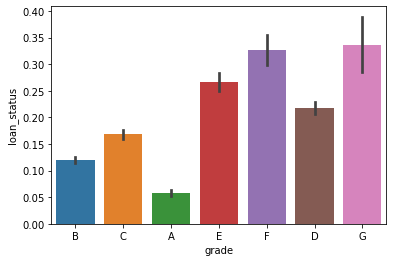

In [25]:
# plotting default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

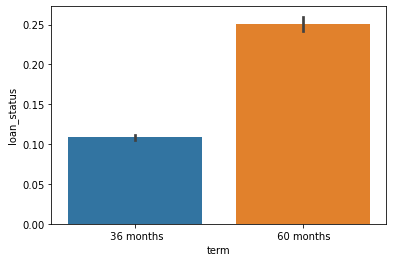

In [26]:
# term: 60 months loans default more than 36 months loans

sns.barplot(x='term', y='loan_status', data=df)
plt.show()

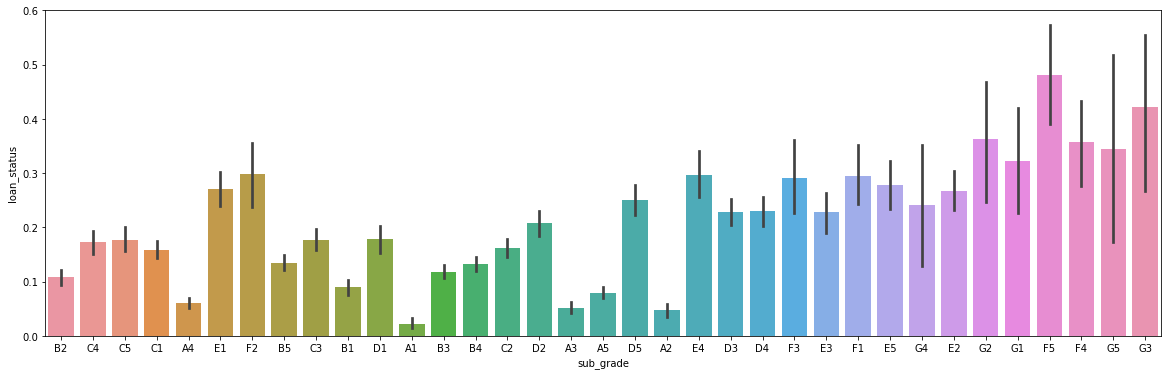

In [27]:
# sub-grade: as expected - A1 is better than A2 better than A3 and so on 
plt.figure(figsize=(20, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df)
plt.show()

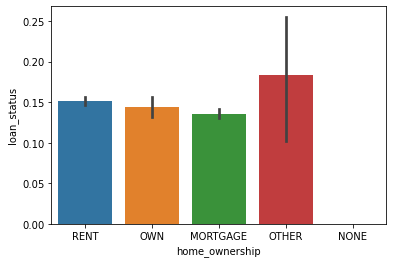

In [28]:
# home ownership: not a great discriminator
sns.barplot(x='home_ownership', y='loan_status', data=df)
plt.show()

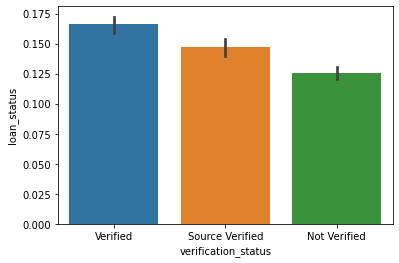

In [29]:
# verification_status: verified loans default more than not verified
sns.barplot(x='verification_status', y='loan_status', data=df)
plt.show()

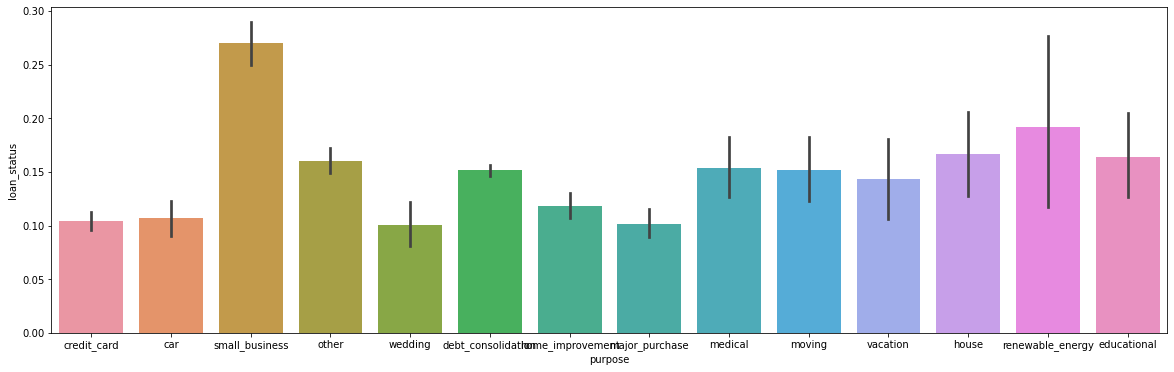

In [30]:
# purpose: small business loans default the most, then renewable energy and education
plt.figure(figsize=(20, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

In [31]:
# distribution of loans across years
# convert the year column into datetime and then extract year and month
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [32]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [33]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [34]:
# number of loans granted across years
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

steadily increase in number of loans across years. 

In [35]:
# number of loans granted across  months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

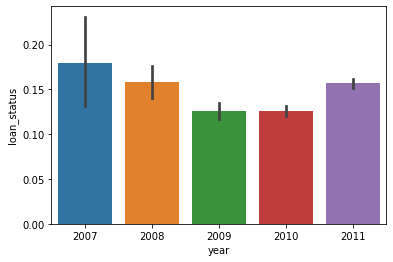

In [36]:
# Compared rates across years
# rate had suddenly increased in 2011
sns.barplot(x='year', y='loan_status', data=df)
plt.show()

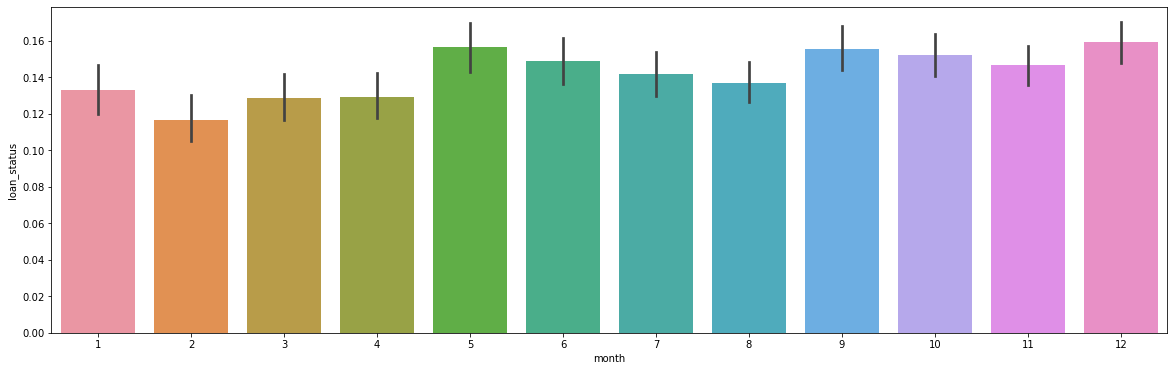

In [37]:
# comparing rates across months: not much variation across months
plt.figure(figsize=(20, 6))
sns.barplot(x='month', y='loan_status', data=df)
plt.show()

Let's now analyse how the default rate varies across continuous variables.

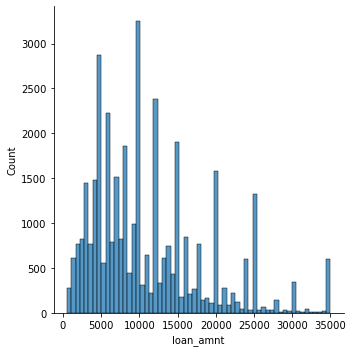

In [38]:
# loan amount: the median loan amount is around 10,000
sns.displot(df['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.

In [39]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [40]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

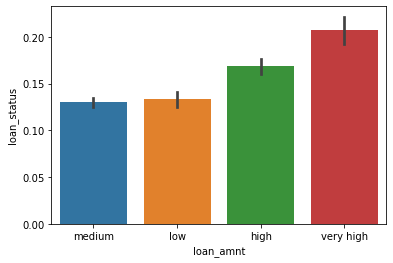

In [41]:
# rates across loan amount type
# higher the loan amount, higher the default rate
sns.barplot(x='loan_amnt', y='loan_status', data=df)
plt.show()

In [42]:
# Convert funded amount invested to bins
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

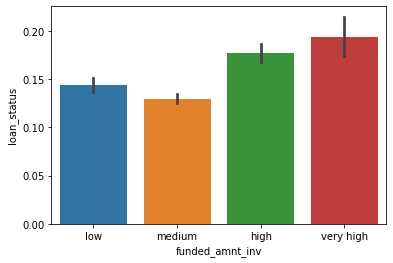

In [43]:
# funded amount invested
sns.barplot(x='funded_amnt_inv', y='loan_status', data=df)
plt.show()

In [44]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

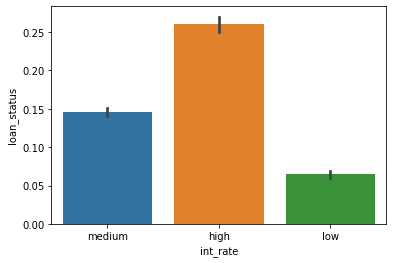

In [45]:
# comparing default rates across rates of interest
# high interest rates default more, as expected
sns.barplot(x='int_rate', y='loan_status', data=df)
plt.show()

In [46]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti'] = df['dti'].apply(lambda x: dti(x))

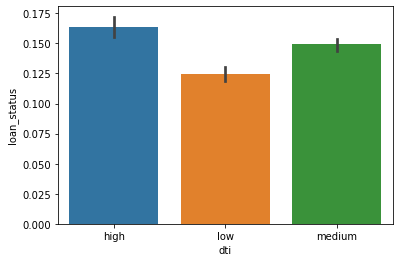

In [47]:
# comparing default rates across debt to income ratio
# high dti translates into higher default rates, as expected
sns.barplot(x='dti', y='loan_status', data=df)
plt.show()

In [48]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment'] = df['installment'].apply(lambda x: installment(x))

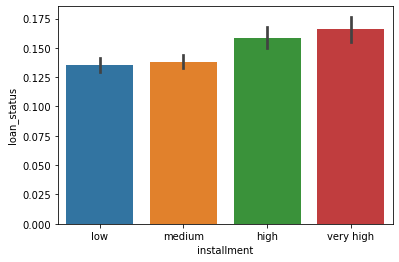

In [49]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
sns.barplot(x='installment', y='loan_status', data=df)
plt.show()

In [50]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

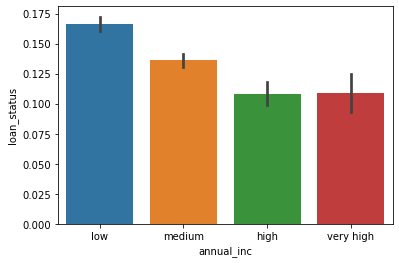

In [51]:
# annual income and default rate
# lower the annual income, higher the default rate
sns.barplot(x='annual_inc', y='loan_status', data=df)
plt.show()

In [52]:
# employment length
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

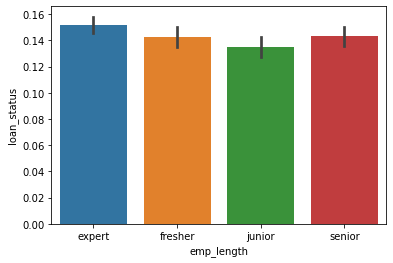

In [53]:
# emp_length and default rate
# not much of a predictor of default
sns.barplot(x='emp_length', y='loan_status', data=df)
plt.show()

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.


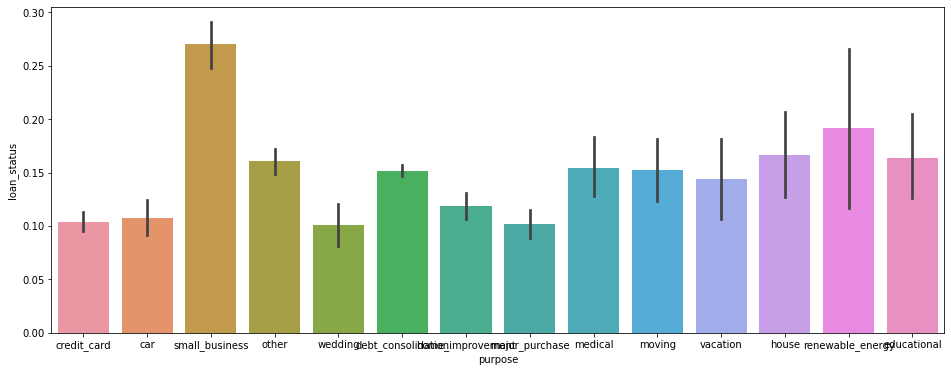

In [55]:
# purpose: small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=df)
plt.show()

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

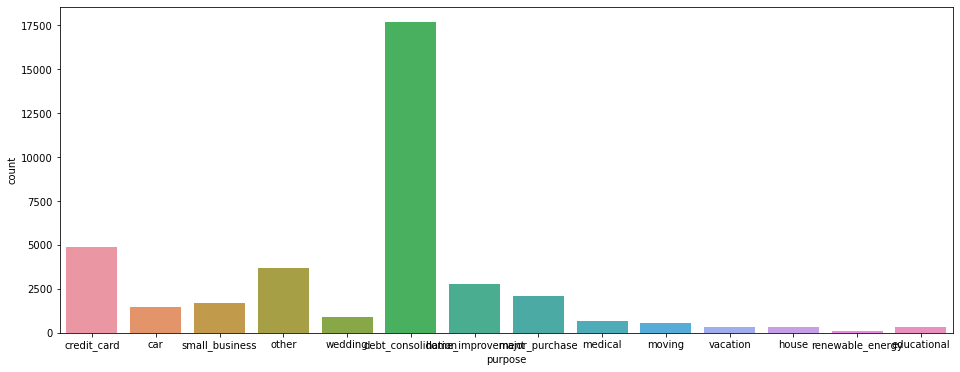

In [56]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=df)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [57]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

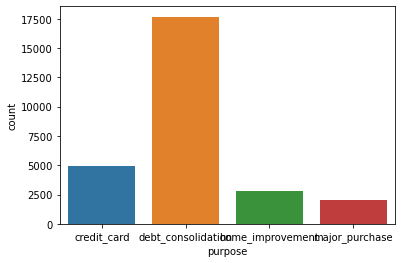

In [58]:
# plotting number of loans by purpose 
sns.countplot(x=df['purpose'])
plt.show()

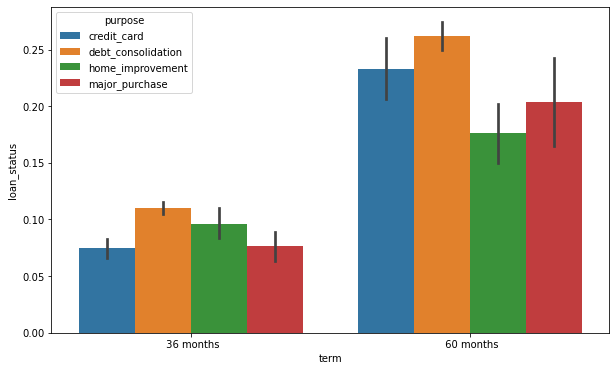

In [59]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()


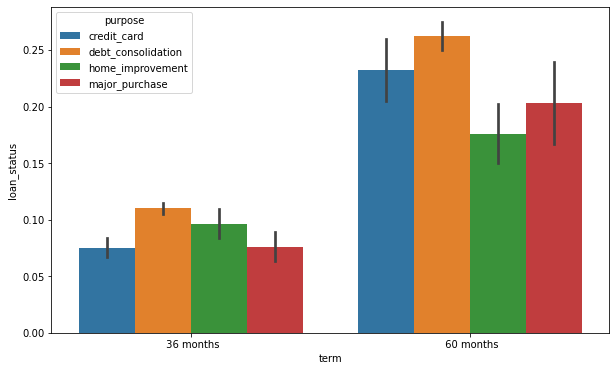

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', hue='purpose', data=df)
plt.show()

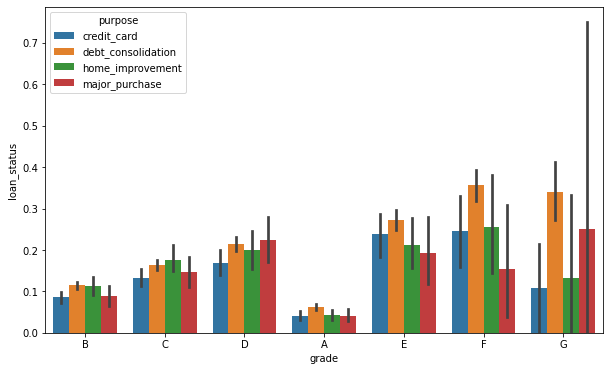

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=df)
plt.show()

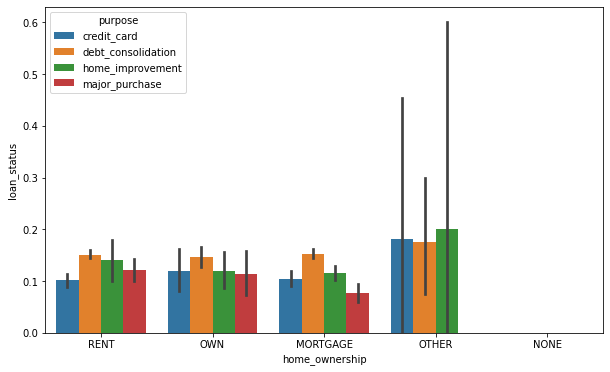

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=df)
plt.show()

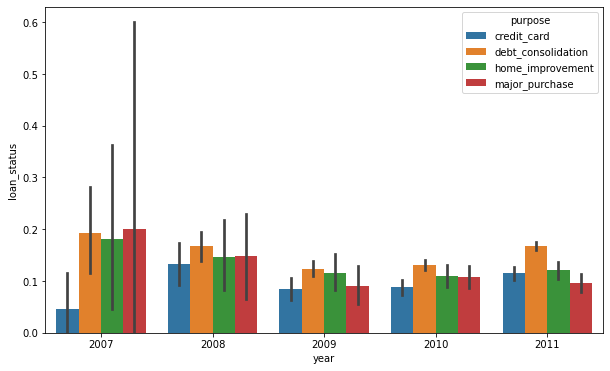

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='loan_status', hue='purpose', data=df)
plt.show()

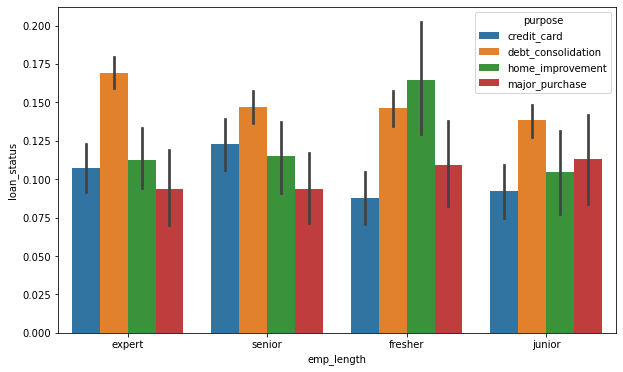

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=df)
plt.show()

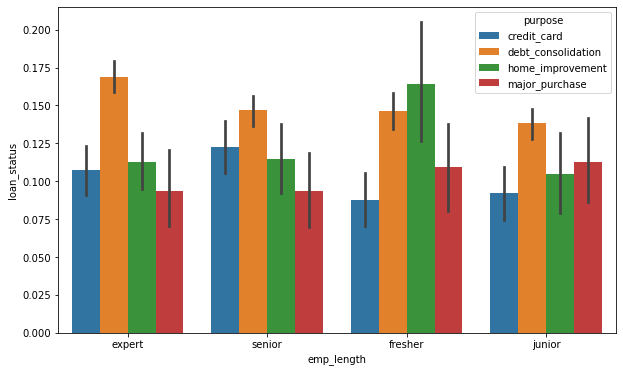

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=df)
plt.show()

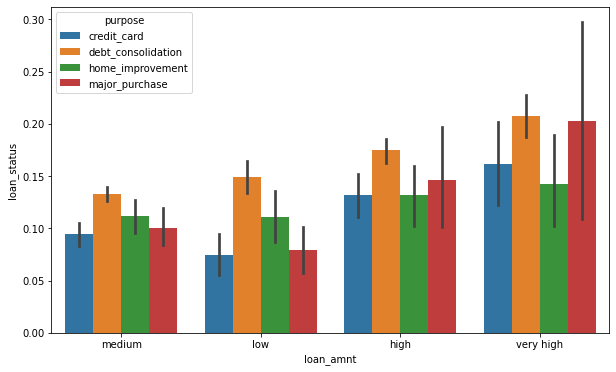

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=df)
plt.show()

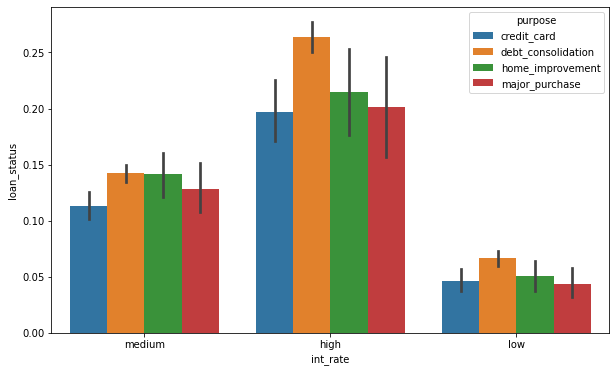

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=df)
plt.show()

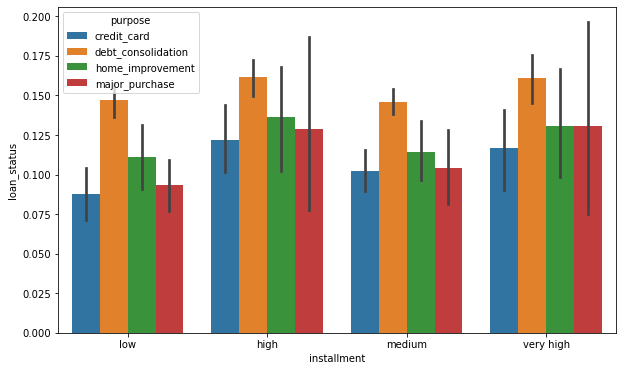

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installment', y='loan_status', hue='purpose', data=df)
plt.show()

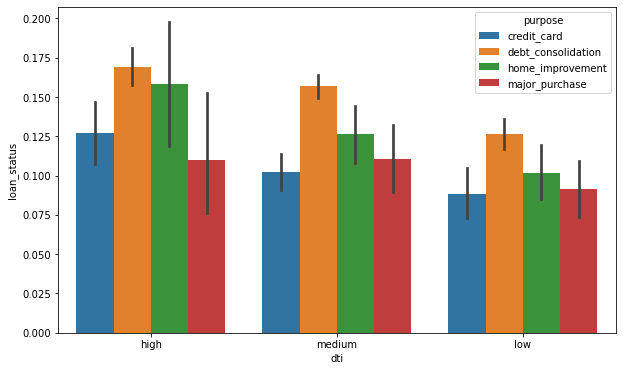

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dti', y='loan_status', hue='purpose', data=df)
plt.show()

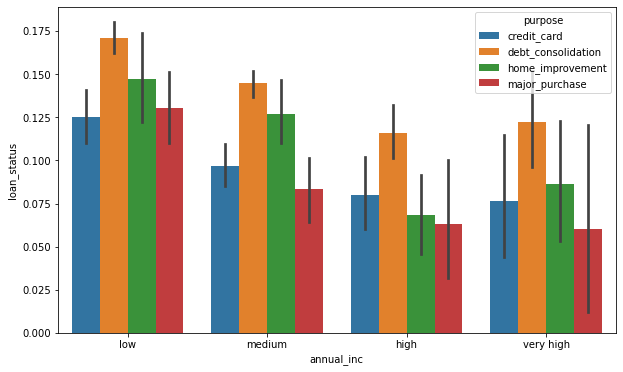

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=df)
plt.show()

To quantify the effect of a categorical variable on default rate is to see as how much does the default rate vary across the categories by using annual_inc as the categorical variable.

In [71]:
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64